# Formaciones geológicas del Uruguay
## Información extraida de dinamige.gub.uy


In [1]:
# importing packages 
import pandas as pd 
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os 
import json

%matplotlib inline 
#%matplotlib qt 

In [2]:
cwd = os.getcwd()

In [3]:
gdf = gpd.read_file(cwd + "\\Geologia_Uruguay_shp\\Unidades_Geologicas.shp")
#elimino datos no necesarios
gdf.drop(['Label', 'SubLabel', 'Codigo','Shape_Leng', 'geometry'], axis=1, inplace=True)


In [4]:
gdf.columns

Index(['Eon', 'Era', 'Fuente', 'Descripcio', 'Origen', 'DomTect_1',
       'DomTect_2', 'Unidad', 'SubUnidad', 'Periodo', 'Epoca', 'Shape_Area'],
      dtype='object')

### Áreas de las unidades

In [5]:
gdfareaU = gdf[['Unidad', 'Shape_Area']].groupby(['Unidad']).sum()
gdfareaU['Shape_Area']=gdfareaU['Shape_Area']/1000000
gdfareaU = gdfareaU.sort_values('Shape_Area',ascending=False,na_position='first')
#gdfareaU = gdfareaU.nlargest(15, 'Shape_Area')
gdfareaU.shape

(78, 1)

In [6]:
gdfareaU['Shape_Area'].sum()

176196.0568238126

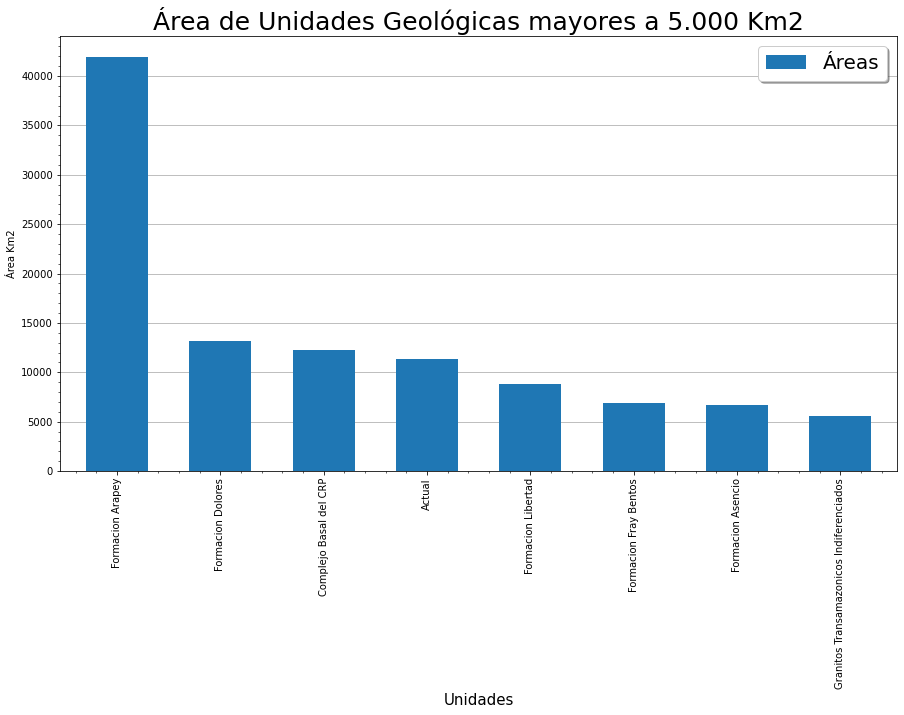

In [7]:
gdfarea5 = gdfareaU.loc[(gdfareaU['Shape_Area']>5000)]

plt.rcParams["figure.figsize"] = (15,8)

plot = gdfarea5.plot(kind='bar', width = 0.6,zorder=2, legend=None)
# Turn on the grid

plt.minorticks_on()
plt.grid(axis = 'y', linestyle='solid',zorder=0)
#plt.grid(which='major', linestyle=':', linewidth='0.2', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10,rotation=0)
plt.title("Área de Unidades Geológicas mayores a 5.000 Km2",fontsize=25,fontweight=300)
plt.xlabel("Unidades",fontsize=15,rotation=0)

rects = plot.patches
labels = [f"label{i}" for i in range(len(rects))]


#FUNCIÓN PARA AGREGAR ETIQUETAS DE DATOS
#add_value_labels(plot)

plt.ylabel("Área Km2")
#plt.grid()
plt.legend(['Áreas'],loc = "upper right",bbox_to_anchor=(1.0, 1.0), shadow=True,fontsize=20)

#plt.bar(dic.keys(), dic.values([0][0]))
plt.show()

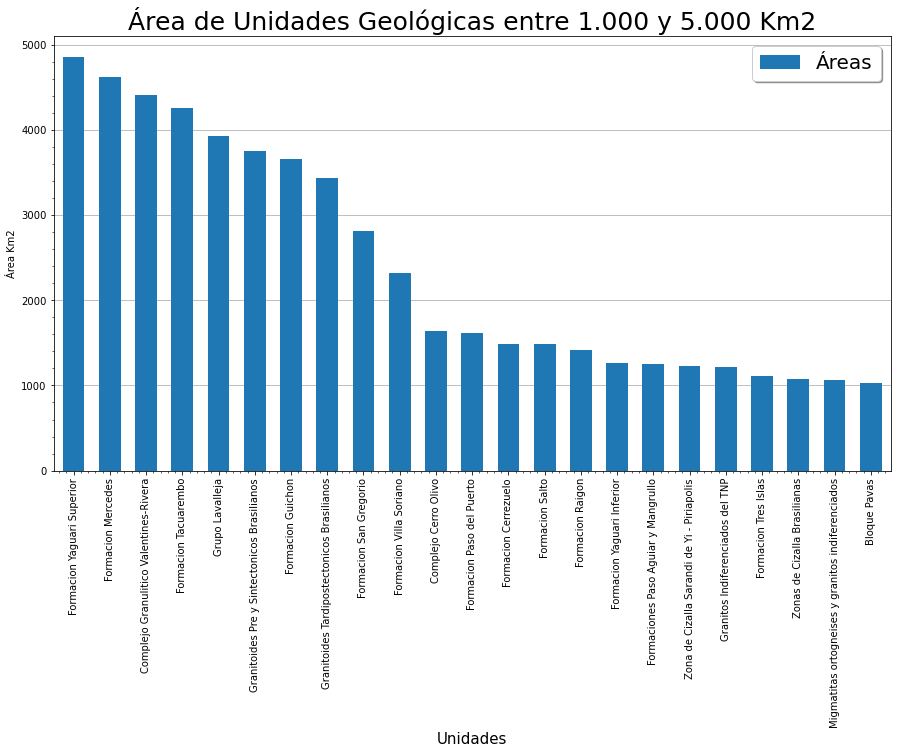

In [8]:
gdfarea5 = gdfareaU.loc[(gdfareaU['Shape_Area']<5000)&(gdfareaU['Shape_Area']>1000)]

plt.rcParams["figure.figsize"] = (15,8)

plot = gdfarea5.plot(kind='bar', width = 0.6,zorder=2, legend=None)
# Turn on the grid

plt.minorticks_on()
plt.grid(axis = 'y', linestyle='solid',zorder=0)
#plt.grid(which='major', linestyle=':', linewidth='0.2', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10,rotation=0)
plt.title("Área de Unidades Geológicas entre 1.000 y 5.000 Km2",fontsize=25,fontweight=300)
plt.xlabel("Unidades",fontsize=15,rotation=0)

rects = plot.patches
labels = [f"label{i}" for i in range(len(rects))]


#FUNCIÓN PARA AGREGAR ETIQUETAS DE DATOS
#add_value_labels(plot)

plt.ylabel("Área Km2")
#plt.grid()
plt.legend(['Áreas'],loc = "upper right",bbox_to_anchor=(1.0, 1.0), shadow=True,fontsize=20)

#plt.bar(dic.keys(), dic.values([0][0]))
plt.show()

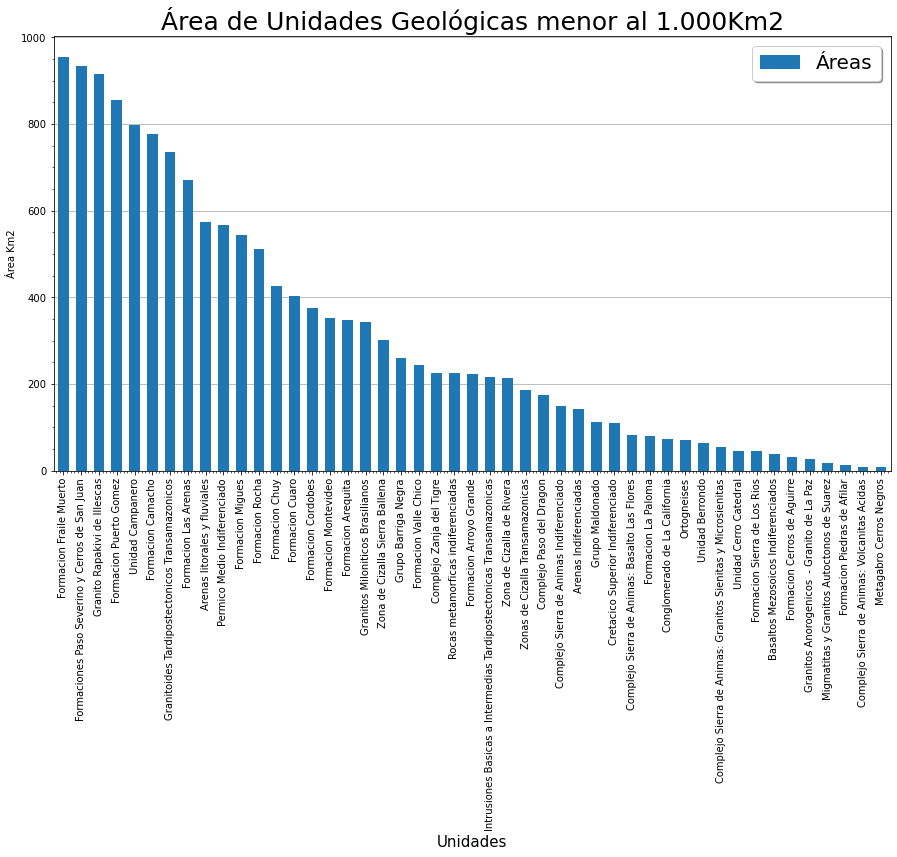

In [9]:
gdfarea5 = gdfareaU.loc[(gdfareaU['Shape_Area']<1000)]

plt.rcParams["figure.figsize"] = (15,8)

plot = gdfarea5.plot(kind='bar', width = 0.6,zorder=2)
# Turn on the grid

plt.minorticks_on()
plt.grid(axis = 'y', linestyle='solid',zorder=0)
#plt.grid(which='major', linestyle=':', linewidth='0.2', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10,rotation=0)
plt.title("Área de Unidades Geológicas menor al 1.000Km2",fontsize=25,fontweight=300)
plt.xlabel("Unidades",fontsize=15,rotation=0)

rects = plot.patches
labels = [f"label{i}" for i in range(len(rects))]


#FUNCIÓN PARA AGREGAR ETIQUETAS DE DATOS
#add_value_labels(plot)

plt.ylabel("Área Km2")
#plt.grid()
plt.legend(['Áreas'],loc = "upper right",bbox_to_anchor=(1.0, 1.0), shadow=True,fontsize=20)

#plt.bar(dic.keys(), dic.values([0][0]))
plt.show()

### Áreas de acuerdo a los períodos

In [10]:
gdfareaP = gdf[['Periodo', 'Shape_Area']].groupby(['Periodo']).sum()
gdfareaP['Shape_Area']=gdfareaP['Shape_Area']/1000000
gdfareaP = gdfareaP.sort_values('Shape_Area',ascending=False,na_position='first')
#gdfareaU = gdfareaU.nlargest(15, 'Shape_Area')
gdfareaP.shape

(15, 1)

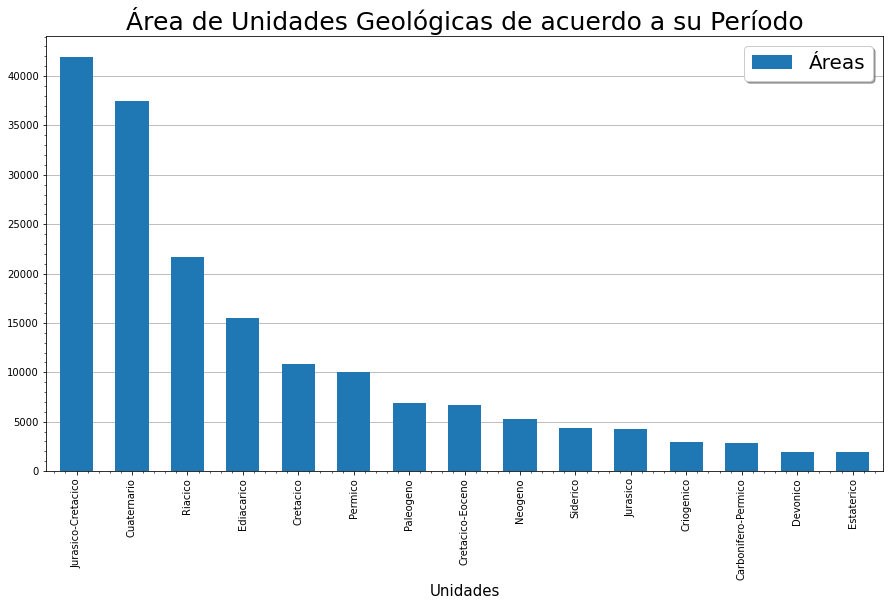

In [11]:
plt.rcParams["figure.figsize"] = (15,8)

plot = gdfareaP.plot(kind='bar', width = 0.6,zorder=2, legend=None)
# Turn on the grid

plt.minorticks_on()
plt.grid(axis = 'y', linestyle='solid',zorder=0)
#plt.grid(which='major', linestyle=':', linewidth='0.2', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10,rotation=0)
plt.title("Área de Unidades Geológicas de acuerdo a su Período",fontsize=25,fontweight=300)
plt.xlabel("Unidades",fontsize=15,rotation=0)

rects = plot.patches
labels = [f"label{i}" for i in range(len(rects))]


#FUNCIÓN PARA AGREGAR ETIQUETAS DE DATOS
#add_value_labels(plot)

#plt.ylabel("Área Km2")
#plt.grid()
plt.legend(['Áreas'],loc = "upper right",bbox_to_anchor=(1.0, 1.0), shadow=True,fontsize=20)

#plt.bar(dic.keys(), dic.values([0][0]))
plt.show()

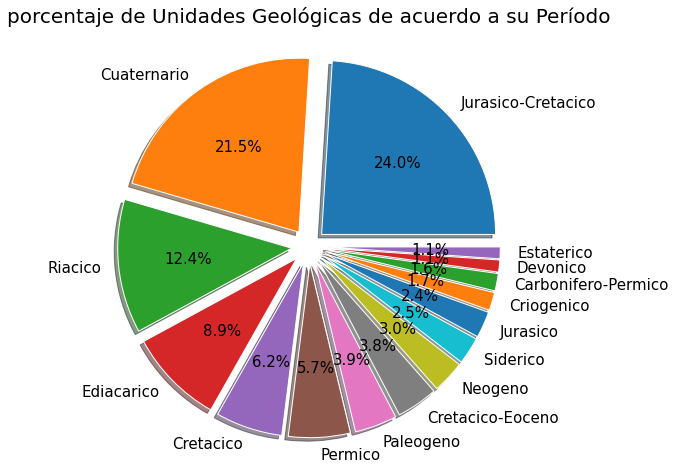

In [12]:
plt.rcParams["figure.figsize"] = (15,8)

plot = gdfareaP.plot(kind = 'pie', y='Shape_Area',shadow=True,fontsize=15, legend =False, autopct='%.1f%%',wedgeprops=
       {'edgecolor':'w'},explode=[0.1]*gdfareaP.shape[0])
plt.ylabel("")
plt.title("porcentaje de Unidades Geológicas de acuerdo a su Período",fontsize=20,fontweight=300)
plt.show()

### Áreas de acuerdo a las eras geológicas



In [13]:
gdfareaE = gdf[['Era', 'Shape_Area']].groupby(['Era']).sum()
gdfareaE['Shape_Area']=gdfareaE['Shape_Area']/1000000
gdfareaE = gdfareaE.sort_values('Shape_Area',ascending=False,na_position='first')
#gdfareaU = gdfareaU.nlargest(15, 'Shape_Area')
gdfareaE.shape

(7, 1)

ValueError: keyword grid_legend is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_contains', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

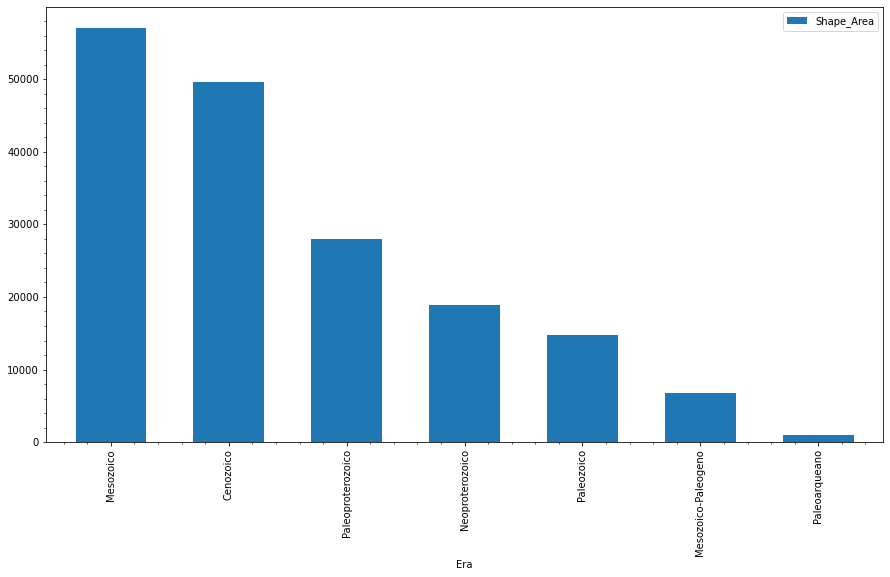

In [14]:
plt.rcParams["figure.figsize"] = (15,8)

plot = gdfareaE.plot(kind='bar', width = 0.6,zorder=2)
# Turn on the grid

plt.minorticks_on()
plt.grid(axis = 'y', linestyle='solid',zorder=0, legend=None)
#plt.grid(which='major', linestyle=':', linewidth='0.2', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10,rotation=0)
plt.title("Área de Unidades Geológicas de acuerdo a su Período",fontsize=25,fontweight=300)
plt.xlabel("Unidades",fontsize=15,rotation=0)

rects = plot.patches
labels = [f"label{i}" for i in range(len(rects))]


#FUNCIÓN PARA AGREGAR ETIQUETAS DE DATOS
#add_value_labels(plot)

#plt.ylabel("Área Km2")
#plt.grid()
plt.legend(['Era'],loc = "upper right",bbox_to_anchor=(1.0, 1.0), shadow=True,fontsize=20)

#plt.bar(dic.keys(), dic.values([0][0]))
plt.show()

### Áreas de acuerdo su origen geológico


In [ ]:
gdfareaO = gdf[['Origen', 'Shape_Area']].groupby(['Origen']).sum()
gdfareaO['Shape_Area']=gdfareaO['Shape_Area']/1000000
gdfareaO = gdfareaO.sort_values('Shape_Area',ascending=False,na_position='first')
#gdfareaU = gdfareaU.nlargest(15, 'Shape_Area')
gdfareaO.shape

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)

plot = gdfareaO.plot(kind='bar', width = 0.6,zorder=2, legend=None)
# Turn on the grid

plt.minorticks_on()
plt.grid(axis = 'y', linestyle='solid',zorder=0)
#plt.grid(which='major', linestyle=':', linewidth='0.2', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10,rotation=0)
plt.title("Área de Unidades Geológicas de acuerdo a su Origen",fontsize=25,fontweight=300)
plt.xlabel("Unidades",fontsize=15,rotation=0)

rects = plot.patches
labels = [f"label{i}" for i in range(len(rects))]


#FUNCIÓN PARA AGREGAR ETIQUETAS DE DATOS
#add_value_labels(plot)

#plt.ylabel("Área Km2")
#plt.grid()

#plt.bar(dic.keys(), dic.values([0][0]))
plt.show()

### Unidades geológicas de acuerdo a su orígen

In [ ]:
gdfareaUO = gdf[['Origen','Unidad','Shape_Area']].groupby(['Origen','Unidad']).sum()
gdfareaUO['Shape_Area']=gdfareaUO['Shape_Area']/1000000
gdfareaUO = gdfareaUO.sort_values(['Origen','Shape_Area'],ascending=False,na_position='first')
#gdfareaU = gdfareaU.nlargest(15, 'Shape_Area')
gdfareaUO.head()

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)

plot = gdfareaUO.plot(kind='bar', width = 0.6,zorder=2, legend=None)
# Turn on the grid

plt.minorticks_on()
plt.grid(axis = 'y', linestyle='solid',zorder=0)
#plt.grid(which='major', linestyle=':', linewidth='0.2', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10,rotation=0)
plt.title("Área de Unidades Geológicas de acuerdo a su Origen",fontsize=25,fontweight=300)
plt.xlabel("Unidades",fontsize=15,rotation=0)

rects = plot.patches
labels = [f"label{i}" for i in range(len(rects))]


#FUNCIÓN PARA AGREGAR ETIQUETAS DE DATOS
#add_value_labels(plot)

#plt.ylabel("Área Km2")
#plt.grid()

#plt.bar(dic.keys(), dic.values([0][0]))
plt.show()

In [16]:
import dash
import dash_core_components as dcc
import dash_html_components as html

<ipython-input-16-bbc1afbeb5a8>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-16-bbc1afbeb5a8>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [17]:
app = dash.Dash()

In [ ]:
if __name__=='__main__':
    app.run_server()


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


Exception on / [GET]
Traceback (most recent call last):
  File "C:\Programs\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Programs\Anaconda3\lib\site-packages\flask\app.py", line 1945, in full_dispatch_request
    self.try_trigger_before_first_request_functions()
  File "C:\Programs\Anaconda3\lib\site-packages\flask\app.py", line 1993, in try_trigger_before_first_request_functions
    func()
  File "C:\Programs\Anaconda3\lib\site-packages\dash\dash.py", line 1361, in _setup_server
    _validate.validate_layout(self.layout, self._layout_value())
  File "C:\Programs\Anaconda3\lib\site-packages\dash\_validate.py", line 407, in validate_layout
    raise exceptions.NoLayoutException(
dash.exceptions.NoLayoutException: The layout was `None` at the time that `run_server` was called.
Make sure to set the `layout` attribute of your application
before running the server.


127.0.0.1 - - [10/Feb/2022 10:59:04] "GET / HTTP/1.1" 500 -


Exception on /favicon.ico [GET]
Traceback (most recent call last):
  File "C:\Programs\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Programs\Anaconda3\lib\site-packages\flask\app.py", line 1945, in full_dispatch_request
    self.try_trigger_before_first_request_functions()
  File "C:\Programs\Anaconda3\lib\site-packages\flask\app.py", line 1993, in try_trigger_before_first_request_functions
    func()
  File "C:\Programs\Anaconda3\lib\site-packages\dash\dash.py", line 1361, in _setup_server
    _validate.validate_layout(self.layout, self._layout_value())
  File "C:\Programs\Anaconda3\lib\site-packages\dash\_validate.py", line 407, in validate_layout
    raise exceptions.NoLayoutException(
dash.exceptions.NoLayoutException: The layout was `None` at the time that `run_server` was called.
Make sure to set the `layout` attribute of your application
before running the server.


127.0.0.1 - - [10/Feb/2022 10:59:05] "GET /favicon.ico HTTP/1.1" 500 -
